<a href="https://colab.research.google.com/github/alyahusnachoirunnisa/Traffic-signs-image-classification/blob/main/%5BDerived%5D_Traffic_Signs_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
from zipfile import ZipFile
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import cv2
from PIL import Image

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Download and Extract Dataset

## Connect to Kaggle Dataset

In [ ]:
# Connect to Kaggle
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/[03]Learning/[Archive]Dataset/kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

## Download Dataset

In [ ]:
# Download Dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract Dataset

In [ ]:
zip_path = '/content/gtsrb-german-traffic-sign.zip'

with ZipFile(zip_path, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


# Data Information

The dataset utilized in this study is the 'GTSRB - German Traffic Sign Recognition Benchmark' dataset obtained from Kaggle. During the model training process, we leveraged the data stored within the 'train' directory. This directory encompasses 43 subdirectories, each representing distinct classes of traffic signs. The data structure is organized as follows:
```
train/
    - 0/
    - 1/
    - ...
    - 42/
```

In [ ]:
# data quantity information
classes = 43
all_images_count = 0

for img_class in range(classes):
  path = os.path.join('./', 'Train', str(img_class))
  count = len(os.listdir(path))
  all_images_count += count
  print(f'directory {img_class}: {count} images')
print(f'\nall images : {all_images_count} images')

directory 0: 210 images
directory 1: 2220 images
directory 2: 2250 images
directory 3: 1410 images
directory 4: 1980 images
directory 5: 1860 images
directory 6: 420 images
directory 7: 1440 images
directory 8: 1410 images
directory 9: 1470 images
directory 10: 2010 images
directory 11: 1320 images
directory 12: 2100 images
directory 13: 2160 images
directory 14: 780 images
directory 15: 630 images
directory 16: 420 images
directory 17: 1110 images
directory 18: 1200 images
directory 19: 210 images
directory 20: 360 images
directory 21: 330 images
directory 22: 390 images
directory 23: 510 images
directory 24: 270 images
directory 25: 1500 images
directory 26: 600 images
directory 27: 240 images
directory 28: 540 images
directory 29: 270 images
directory 30: 450 images
directory 31: 780 images
directory 32: 240 images
directory 33: 689 images
directory 34: 420 images
directory 35: 1200 images
directory 36: 390 images
directory 37: 210 images
directory 38: 2070 images
directory 39: 300 

# Load Dataset

In [ ]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for img_class in range(classes):
  path = os.path.join('./', 'Train', str(img_class))
  images = os.listdir(path)

  for image in images:
    image_path = os.path.join(path, image)
    try:
      image = Image.open(image_path)
      image = image.resize((30, 30))
      image = np.array(image)
      data.append(image)
      labels.append(img_class)
    except:
      print('Error loading image')

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Data Splitting and Conversion

In [ ]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=27)

# Checking data shape
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (31367, 30, 30, 3)
y_train : (31367,)
X_test : (7842, 30, 30, 3)
y_test : (7842,)


In [ ]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


# Creating and Compiling the Model

In [ ]:
# Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

# Training the model

In [ ]:
# Training the model
epoch = 15
hist = model.fit(X_train, y_train, batch_size=32, epochs=epoch, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 156s 150ms/step - loss: 2.1927 - accuracy: 0.4597 - val_loss: 0.5166 - val_accuracy: 0.8812
Epoch 2/15
981/981 [==============================] - 146s 149ms/step - loss: 0.6837 - accuracy: 0.7989 - val_loss: 0.1935 - val_accuracy: 0.9466
Epoch 3/15
981/981 [==============================] - 146s 149ms/step - loss: 0.4148 - accuracy: 0.8840 - val_loss: 0.1208 - val_accuracy: 0.9721
Epoch 4/15
981/981 [==============================] - 152s 155ms/step - loss: 0.3422 - accuracy: 0.9026 - val_loss: 0.1139 - val_accuracy: 0.9684
Epoch 5/15
981/981 [==============================] - 147s 150ms/step - loss: 0.3018 - accuracy: 0.9157 - val_loss: 0.1165 - val_accuracy: 0.9666
Epoch 6/15
981/981 [==============================] - 148s 151ms/step - loss: 0.2643 - accuracy: 0.9265 - val_loss: 0.0833 - val_accuracy: 0.9795
Epoch 7/15
981/981 [==============================] - 149s 152ms/step - loss: 0.2369 - accuracy: 0.9325 - val_loss: 0.0668 -

# Model Evaluation

## Visualize model training performance

In [ ]:
metrics = list(hist.history.keys())

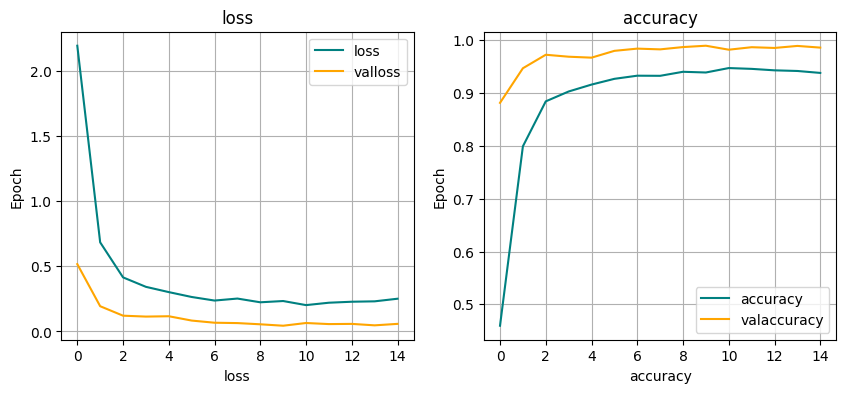

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
for idx, metric in enumerate(metrics[:2]):
  ax[idx].plot(hist.history[metric], color='teal', label=metric)
  ax[idx].plot(hist.history[metrics[idx+2]], color='orange', label='val'+metric)
  ax[idx].set_title(metric)
  ax[idx].set_xlabel(metric)
  ax[idx].set_ylabel('Epoch')
  ax[idx].grid(True)
  ax[idx].legend()
plt.show()

## Accuracy Score

### Prepare test data

In [ ]:
# load test dataset
test_data = pd.read_csv('/content/Test.csv')
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
# define image and labels
labels = test_data['ClassId'].values
imgs = test_data['Path'].values

In [ ]:
# retreiving images
data = []
for img in imgs:
  image_path = os.path.join('.', img)
  image = Image.open(image_path)
  image = image.resize((30,30))
  data.append(np.array(image))

X_test = np.array(data)
y_test = np.array(labels)

### Predict test data

In [ ]:
pred = model.predict(X_test)

395/395 [==============================] - 16s 40ms/step


In [ ]:
type(pred), pred.shape

(numpy.ndarray, (12630, 43))

In [ ]:
pred_argmax = np.argmax(pred, axis=-1)

In [ ]:
pred_argmax.shape

(12630,)

### Accuracy score

In [ ]:
accuracy_score(labels, pred_argmax)

0.9571654790182106